In [8]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit


In [10]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = ['DE_104_10_30.mpt'], mask = [1000018.6, 89.115974])
mpt.df[0].head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,328.734100,454.916410,561.262020,-54.147171,1.607492,-0.000910,0.000019,0.000350,0.000230,1.0,12.0,0.000628,0.000001,-4.540541e-09,0.000425,0.001044,0.001444,0.001782,54.147171,-4.540541e-09,NaN,6.283302e+06
1,891246.69,-4.140771,13.204187,13.838228,-107.411180,2.622600,-0.001409,-0.012680,0.013524,0.012313,1.0,9.0,0.000059,0.000004,-1.749967e-06,0.001066,-0.021623,0.068953,0.072264,107.411180,-1.745426e-06,NaN,5.599868e+06
2,794332.69,390.277950,523.672730,653.107970,-53.303917,4.101484,-0.001784,0.000011,0.000383,0.000246,1.0,12.0,0.001122,0.000002,-3.754701e-06,0.000585,0.000915,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,707949.81,417.907010,565.725160,703.342900,-53.546337,4.696477,-0.001941,0.000016,0.000397,0.000257,1.0,12.0,0.002918,0.000004,-3.727839e-06,0.000666,0.000845,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,630956.81,449.914950,618.398680,764.748600,-53.962299,5.292477,-0.002067,0.000007,0.000408,0.000267,1.0,12.0,0.005477,0.000007,-3.718076e-06,0.000746,0.000769,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06


In [11]:
bad_inds = [0,1]
for i in bad_inds:
    mpt.df[0] = mpt.df[0].drop(i)
mpt.df[0].head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
2,794332.69,390.27795,523.67273,653.10797,-53.303917,4.101484,-0.001784,0.000011,0.000383,0.000246,1.0,12.0,0.001122,0.000002,-0.000004,0.000585,0.000915,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,707949.81,417.90701,565.72516,703.34290,-53.546337,4.696477,-0.001941,0.000016,0.000397,0.000257,1.0,12.0,0.002918,0.000004,-0.000004,0.000666,0.000845,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,630956.81,449.91495,618.39868,764.74860,-53.962299,5.292477,-0.002067,0.000007,0.000408,0.000267,1.0,12.0,0.005477,0.000007,-0.000004,0.000746,0.000769,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06
5,562342.25,482.34793,677.75867,831.87518,-54.561264,5.888485,-0.002128,0.000030,0.000418,0.000277,1.0,12.0,0.008861,0.000011,-0.000004,0.000505,0.000697,0.000979,0.001202,54.561264,1.627464e-08,NaN,3.533301e+06
6,501206.19,518.72150,741.28729,904.75348,-55.017300,6.485476,-0.002174,0.000006,0.000428,0.000288,1.0,12.0,0.013163,0.000015,-0.000004,0.000585,0.000634,0.000906,0.001105,55.017300,1.041643e-08,NaN,3.149171e+06


In [12]:
mpt.guesser()

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,DE_104_10_30.mpt,19.875348,409.5,0.100001,797.894768,0.001042,7241.135916,0.770529,31441.353783,1.147404e-08,4.292436e-07,0.733218


No handles with labels found to put in legend.


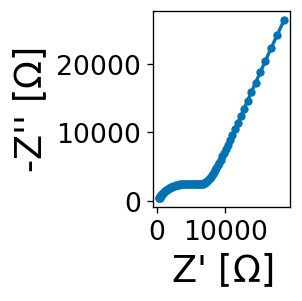

In [2]:
mpt.mpt_plot()

In [29]:
mpt.guesser()

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,DE_104_1_30_trimmed.mpt,239.505055,1398.063635,0.91046,95238.228566,3.933243e-09,5241.314751,0.766801,20831.759901,2.274630e-08,3.954920e-07,0.734353


In [25]:
mpt.low_error

172109.43593206568

No handles with labels found to put in legend.


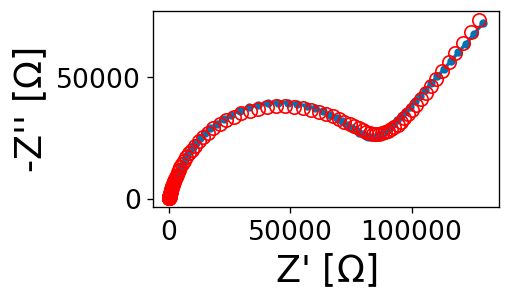

In [26]:
mpt.mpt_plot(fitting = 'on')

In [3]:
mpt.guesser(circuit = 'R-RQ-Q')

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_Q,fit_n2
0,DE_104_1_30_trimmed.mpt,181.314956,6597.988141,0.749495,31151.715589,1.638755e-08,4.055879e-07,0.730068


No handles with labels found to put in legend.


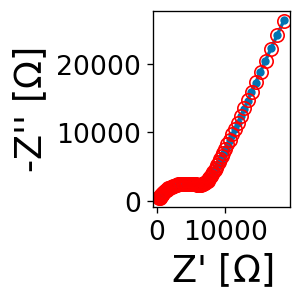

In [4]:
mpt.mpt_plot(fitting = 'on')

In [25]:
mpt.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,328.734100,454.916410,561.262020,-54.147171,1.607492,-0.000910,0.000019,0.000350,0.000230,1.0,12,0.000628,0.000001,-4.540541e-09,0.000425,0.001044,0.001444,0.001782,54.147171,-4.540541e-09,NaN,6.283302e+06
1,891246.69,-4.140771,13.204187,13.838228,-107.411180,2.622600,-0.001409,-0.012680,0.013524,0.012313,1.0,9,0.000059,0.000004,-1.749967e-06,0.001066,-0.021623,0.068953,0.072264,107.411180,-1.745426e-06,NaN,5.599868e+06
2,794332.69,390.277950,523.672730,653.107970,-53.303917,4.101484,-0.001784,0.000011,0.000383,0.000246,1.0,12,0.001122,0.000002,-3.754701e-06,0.000585,0.000915,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,707949.81,417.907010,565.725160,703.342900,-53.546337,4.696477,-0.001941,0.000016,0.000397,0.000257,1.0,12,0.002918,0.000004,-3.727839e-06,0.000666,0.000845,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,630956.81,449.914950,618.398680,764.748600,-53.962299,5.292477,-0.002067,0.000007,0.000408,0.000267,1.0,12,0.005477,0.000007,-3.718076e-06,0.000746,0.000769,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06
